#                     South African Language Identification Hack 2022

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#two>3. Data Cleaning</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Conclusion</a>

## Description of data set

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

## 1. Importing Packages

We start by `importing` relevant libraries and modules 

In [9]:
#importing the required libraries
# Libraries for data loading, data manipulation and data visulisation
#Libraries for data cleaning and preprocessing
#Libraries for data preparation and model building
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_extraction.text import CountVectorizer
warnings.simplefilter("ignore")


from sklearn.model_selection import train_test_split

 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer

## 2. Loading the Data

We frist start by loading in our dataset, both the `training` and `testing` dataset are loaded as a pandas dataframe

In [10]:
#load the training and test data set
df_train=pd.read_csv('train_set.csv')
df_test=pd.read_csv('test_set.csv')

## 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) : After loading in our dataset, we first begin with the vital component which is the EDA, to better understand the dataset we are working with and to gain insight about the `features` and `labels` by performing `Univariate` or `Multivariate` , `Non-graphical` or `Graphical Analysis`"

We will take a quick look at the first few rows of the training and testing dataset to have an overview of our features and labels (using `pd.head()` method)

In [11]:
#The first five rows of the traing dataset
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [12]:
#The first five rows of the test dataset
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [13]:
#checking the shape of the training dataframe
df_train.shape
print("The training dataset has {0} rows and {1} columns".format(df_train.shape[0], df_train.shape[1]))

The training dataset has 33000 rows and 2 columns


In [14]:
#checking for unique values
df_test["index"].value_counts()

1       1
3818    1
3794    1
3793    1
3792    1
       ..
1893    1
1892    1
1891    1
1890    1
5682    1
Name: index, Length: 5682, dtype: int64

Show the number of `languages` and the total number of `sentenses` in the dataset.

In [15]:
#checking for unique values
df_train["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [16]:
#checking the information of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [17]:
# examining the stop words
df_train['text'][0:5]

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

In this phase we ploting the distribution of languges in our data set

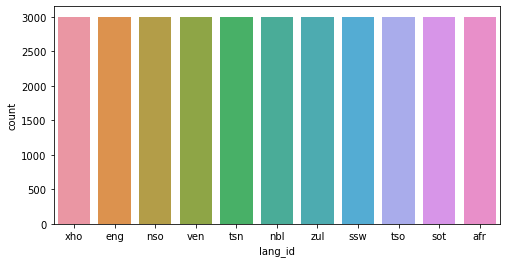

In [18]:
#ploting the distribution of unique label values
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="lang_id", data=df_train)
plt.show()

8.0
8.0


<AxesSubplot:ylabel='lang_id'>

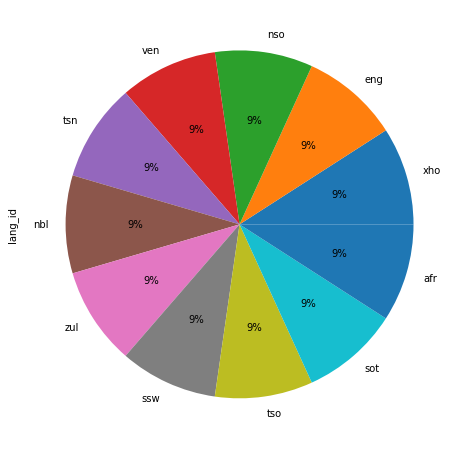

In [60]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 

#  distribution of sentenses from the dataset
df_train.lang_id.value_counts().plot(kind='pie', autopct='%1.0f%%')

- It shows that our data is balanced, therefore the model will be able to produce the accurate results
- All the languages have equal percentage of data distribution.

## 4 Feature Engineering

In this Section we will be applying `feature engineering` to our dataset, we will try to enrich the dataset and if possible add some new features.

We will start by Classifying the `independent` and `dependent` variables

In [19]:
X = df_train["text"] #text is an independent variable of the train data
y = df_train["lang_id"] #lang_id is an dependent variable of the train data
X_tt = df_test['text'] #text is an independent variable of the test data

We are now preocessing our data by 
`Cleaning` our dataset to remove symbols that will determine the quality of our model.

In [20]:
# creating a list for appending the preprocessed text
df_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        df_list.append(text)

In [21]:
# creating a list for appending the preprocessed text in the text data set
df_list1 = []
# iterating through all the text
for text in X_tt:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        df_list1.append(text)

### Bag of Words
- We want Our model to take in numerical data Using `CountVectorizer` to convert our dataset from text to numerical form.

In [22]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [23]:
#look at the shape
X.shape 

(33000, 141958)

We use `transform` on the test dataset because we have used the scaled paramaters learned from the train data to scale the test data

In [24]:
# The test data is transformed using transform()
X_tt = cv.transform(X_tt)
X_tt.shape

(5682, 141958)

Train Test Splitting Creating the training set, for training the model

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

## 5 Model Training and Prediction

Here we train our model uisng different models from the training set and later predict the output for the test set using the `classification report`.

### Naive_Bayes 

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

#fitting the Naive_Bayes model
model.fit(x_train, y_train)

#predicting the y labels
y_pred1 = model.predict(x_test)

#metrics reporting
acc = accuracy_score(y_test, y_pred1)

report = classification_report(y_test,y_pred1)

print("Accuracy is :",acc)
#print("Matrix is :",cm)
print("Report is :",report)

Accuracy is : 0.9990909090909091
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      1.00       574
         nbl       1.00      1.00      1.00       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       1.00      1.00      1.00       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Support Vector Classifier

In [27]:
svc = SVC( kernel='rbf')
svc.fit(x_train, y_train)
y_pred4 = svc.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred4)
report = classification_report(y_test,y_pred4)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9940909090909091
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.98      0.98       613
         nso       1.00      0.99      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      1.00      1.00       624
         tsn       0.99      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       0.99      0.99      0.99       621
         zul       0.97      0.98      0.98       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### Logistics Regression

In [28]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)# Creating a logistics regression
#fit the train data
LRmodel.fit(x_train, y_train)
#predict y labels
y_pred2 = LRmodel.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred2)

report = classification_report(y_test,y_pred2)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9953030303030304
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.99      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      1.00      0.99       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      0.99      0.99       621
         zul       0.98      0.98      0.98       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



 ## 6 Model Evaluation

We will go head to compare the model perfomance of the models defined above.

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
# Checking the performance of our Naive_Bayes Model.
print('Naive_Bayes Metric results')
print("accuracy of the model is {}".format(model.score(x_test, y_test)))


Naive_Bayes Metric results
accuracy of the model is 0.9990909090909091


In [49]:
# Checking the performance of our Logistic Regression Model.
print('LogisticRegression Metric results')
print("accuracy of the model is {}".format(LRmodel.score(x_test, y_test)))


LogisticRegression Metric results
accuracy of the model is 0.9953030303030304


In [50]:
# Checking the performance of our Support Vector Classifier.
print('Support Vector Classifier Metric results')
print("accuracy of the model is {}".format(svc.score(x_test, y_test)))


Support Vector Classifier Metric results
accuracy of the model is 0.9940909090909091


### Predictions with the test dataset

In [53]:
#checking the shape of indepentent x variable of test set
X_tt.shape

(5682, 141958)

In [54]:
#predict the naive bayes model
text_pred= model.predict(X_tt)

In [56]:
#The following code is used to save the predictions for kaggle.

kaggle_bnb = df_test[['index']]
kaggle_bnb['lang_id']= text_pred
kaggle_bnb.to_csv('sample_submission.csv', index = None)

In [57]:
import pandas as pd

In [58]:
#load the submision data
#looking at the five rows of the submission dataframe
df_sub=pd.read_csv('sample_submission.csv')
df_sub.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


# 7 Conclusion

We went through  feature engineering to improve the data, train a Machine Learning Model and arrive at a model with a good performance to better predict unseen data . We noticed that the Multinormal Naive Bayes has proven to be a better model in language, hence more accurate results were produced.
